In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import seaborn as sns

In [20]:
import pickle

f = pd.read_csv('/content/drive/MyDrive/BostonHousing.csv')

print(f.shape)
print(f.corr())



(506, 14)
             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064 

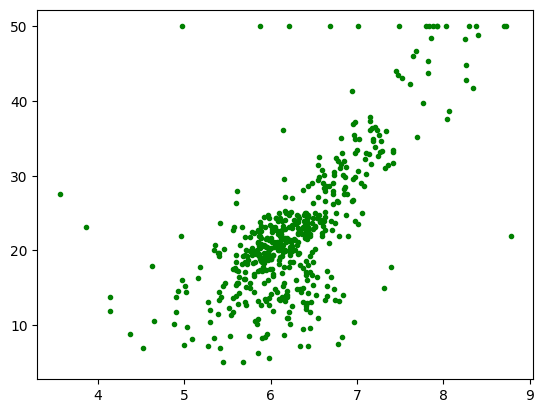

In [34]:
a = plt.scatter(f['rm'], f['medv'], color = 'green', marker = '.')
print(a)

<Axes: >

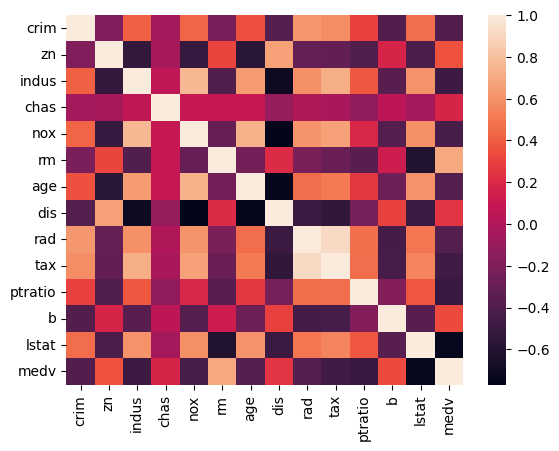

In [25]:
sns.heatmap(f.corr())

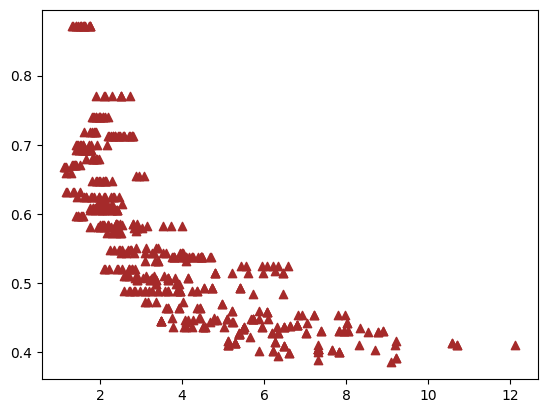

In [41]:
a = plt.scatter(f['dis'], f['nox'], color = 'brown', marker = '^')
print(a)

In [44]:
X = f.drop('medv', axis =1 )
y = f['medv']
print(X)
print('\n')
print(y)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [45]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
yp = model.predict(X_test)
print(X_test)
print(y_test)
print(yp)

         crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
173   0.09178   0.0   4.05     0  0.510  6.416   84.1  2.6463    5  296   
274   0.05644  40.0   6.41     1  0.447  6.758   32.9  4.0776    4  254   
491   0.10574   0.0  27.74     0  0.609  5.983   98.8  1.8681    4  711   
72    0.09164   0.0  10.81     0  0.413  6.065    7.8  5.2873    4  305   
452   5.09017   0.0  18.10     0  0.713  6.297   91.8  2.3682   24  666   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
412  18.81100   0.0  18.10     0  0.597  4.628  100.0  1.5539   24  666   
436  14.42080   0.0  18.10     0  0.740  6.461   93.3  2.0026   24  666   
411  14.05070   0.0  18.10     0  0.597  6.657  100.0  1.5275   24  666   
86    0.05188   0.0   4.49     0  0.449  6.015   45.1  4.4272    3  247   
75    0.09512   0.0  12.83     0  0.437  6.286   45.0  4.5026    5  398   

     ptratio       b  lstat  
173     16.6  395.50   9.04  
274     17.6  396.90   3.53  
491     2

In [51]:
mae = mean_absolute_error(y_test, yp)
mse = mean_squared_error(y_test, yp)
r2 = r2_score(y_test, yp)
rmse = np.sqrt(mse)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MAE: 3.189091965887837
MSE: 24.291119474973478
RMSE: 4.928602182665332
R2: 0.6687594935356326


In [59]:
from sklearn.datasets import load_diabetes
d = load_diabetes()
# print(d.DESCR)
# print(d.data)
# print(d.target)
# print(d.feature_names)

df = pd.DataFrame(d.data, columns = d.feature_names)
df['target'] = d.target
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
